## Observations and Insights 

*Ramicane drug displays the greatest reduction of tumor volume with a mean size of 40.22 (mm3), whilst Ketapril displays the least reduction of tumor volume with a mean of 55.24 (mm3).
*Mice gender was almost evenly distributed with 125 male mice and 124 female mice.
*There is a positive correlation between the average tumor increase and the weight of mouse.

In [240]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data_df = pd.merge(mouse_metadata, study_results, on ="Mouse ID")
combined_mouse_data_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [241]:
# Checking the number of mice.
number_of_mice = len(combined_mouse_data_df["Mouse ID"].unique())
number_of_mice


249

In [242]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# duplicate_mice = combined_mouse_data_df.loc[combined_mouse_data_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_mice = combined_mouse_data_df[combined_mouse_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [243]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all = combined_mouse_data_df[combined_mouse_data_df["Mouse ID"] == "g989"]
duplicate_mice_all


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [244]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice_drop_df = combined_mouse_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')

# duplicate_mice_drop_df = combined_mouse_data_df[combined_mouse_data_df["Mouse ID"].isin(duplicate_mice) ==False]
duplicate_mice_drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [245]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(duplicate_mice_drop_df["Mouse ID"].unique())
mice_count


249

## Summary Statistics

In [246]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_statistics = duplicate_mice_drop_df.groupby("Drug Regimen")

print(summary_statistics["Mouse ID"].count())

mean = summary_statistics["Tumor Volume (mm3)"].mean()
median = summary_statistics["Tumor Volume (mm3)"].median()
variance = summary_statistics["Tumor Volume (mm3)"].var()
st_dev = summary_statistics["Tumor Volume (mm3)"].std()
sem = summary_statistics["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({"Mean":mean,
                                    "Median":median,
                                    "Variance":variance,
                                    "St. Deviation":st_dev,
                                    "SEM":sem})

summary_statistics_df



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


,Mean,Median,Variance,St. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [247]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistics_groupby = duplicate_mice_drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics_groupby

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

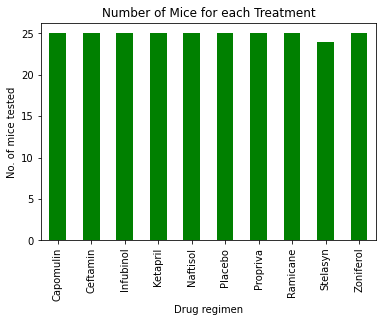

In [248]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

panda_plot = duplicate_mice_drop_df.groupby(["Drug Regimen"])['Mouse ID'].nunique()

panda_plot.plot(kind='bar',
                title='Number of Mice for each Treatment', 
                ylabel = 'No. of mice tested', 
                xlabel = 'Drug regimen',
                color='green');



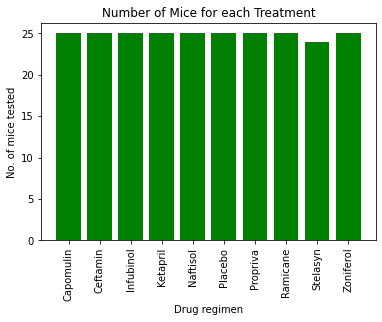

In [249]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(0,len(panda_plot))

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Number of Mice for each Treatment")
plt.xlabel("Drug regimen")
plt.ylabel("No. of mice tested")

plt.bar(panda_plot.index, panda_plot, 
        color='green', 
        align="center")
plt.xticks(tick_locations,panda_plot.index,rotation ="vertical");

Male      125
Female    124
Name: Sex, dtype: int64

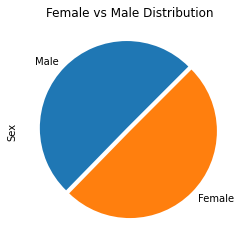

In [250]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = duplicate_mice_drop_df[["Mouse ID","Sex"]].drop_duplicates()

explode=(0.05,0)

pie_sex_count = gender["Sex"].value_counts()
pie_sex_count.plot(kind='pie',
                title ='Female vs Male Distribution',
                startangle = 45,
                explode = explode)

pie_sex_count


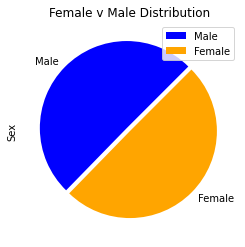

In [251]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_sex_count,
        labels = pie_sex_count.index,colors=colors,
        startangle = 45,
        explode = explode)

plt.title("Female v Male Distribution")
plt.ylabel("Sex")
plt.legend(loc= "best")
plt.show()


## Quartiles, Outliers and Boxplots

In [252]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

timepoint = duplicate_mice_drop_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_volume_df = pd.merge(duplicate_mice_drop_df, timepoint, how="inner", on=["Mouse ID","Timepoint"])
tumor_volume_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [253]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for drugs in drug_list:
    tumor_volume_quartile = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"]==drugs]["Tumor Volume (mm3)"]
    tumor_list.append(tumor_volume_quartile)

quartiles = tumor_volume_quartile.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

outlier = tumor_volume_quartile.loc[(tumor_volume_quartile > upperq) | (tumor_volume_quartile < lowerq)]

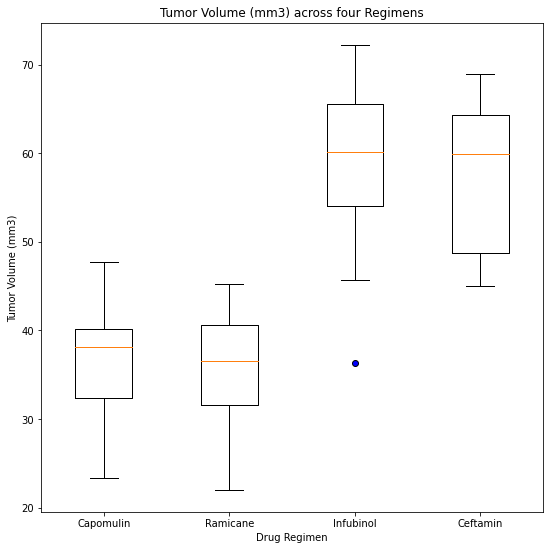

In [254]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_dot = dict(markerfacecolor="b",
                marker="o")

fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.boxplot(tumor_list, flierprops=blue_dot)
ax1.xaxis.set(ticks=range(1,len(drug_list) + 1),ticklabels=drug_list)

ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

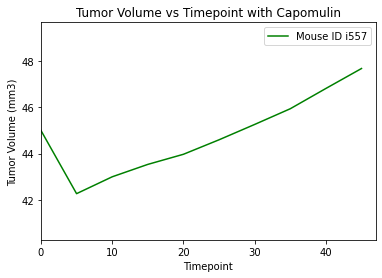

In [255]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

sample_mouse = (duplicate_mice_drop_df[duplicate_mice_drop_df["Drug Regimen"]=="Capomulin"]).sample()
sample_data = pd.merge(duplicate_mice_drop_df, sample_mouse, on="Mouse ID", how="inner")
sample_df = sample_data.drop([col for col in sample_data.columns if '_y' in col], axis=1)

time = sample_df["Timepoint_x"]
vol = sample_df["Tumor Volume (mm3)_x"]
label = sample_df["Mouse ID"].unique()

#print(random_mouse["Mouse ID"])
line, = plt.plot(time, vol, 
                color ='green')

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint with Capomulin")

plt.xlim(0, time.max() + 2)
plt.ylim(vol.min() - 2, vol.max() + 2)

plt.legend("Mouse ID " +label, 
            loc = "best")

plt.show()

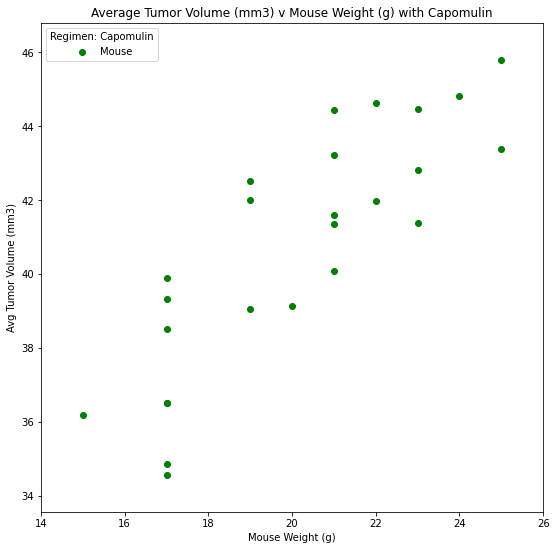

In [260]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

regimen = duplicate_mice_drop_df.loc[duplicate_mice_drop_df["Drug Regimen"]== "Capomulin"]
tvolume = regimen.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = regimen.groupby(["Mouse ID"])["Weight (g)"].mean()

mouse_vol_wt = pd.merge(tvolume,mouse_weight, on="Mouse ID", how="inner")
mouse_vol_wt = mouse_vol_wt.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})
vol = mouse_vol_wt.iloc[:,0]
wt = mouse_vol_wt.iloc[:,1]

fig, ax = plt.subplots(figsize=(9,9))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="o", 
            facecolors="green")
ax.legend(["Mouse"],
            title="Regimen: Capomulin",
            loc="upper left")

plt.title("Average Tumor Volume (mm3) v Mouse Weight (g) with Capomulin")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")

plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)

plt.show()

## Correlation and Regression

In [257]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_coefficient = round(st.pearsonr(wt, vol)[0],2)
correlation_coefficient

0.84

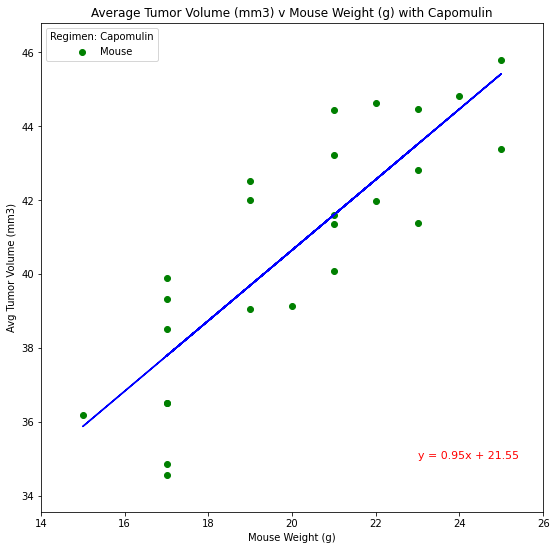

In [262]:
#linear regression model
slope, inter, rvalue, pvalue, std_err = st.linregress(wt, vol)

#create equation of line
line = slope * wt + inter
line_equation = f"y = {round(slope,2)}x + {round(inter,2)}" 

#plot linear model on top of scatter plot
fig, ax = plt.subplots(figsize=(9,9))

ax.scatter(wt, vol, marker="o", 
            facecolors="green")

ax.legend(["Mouse"],
            title="Regimen: Capomulin",
            loc="upper left")

plt.plot(wt, line, 
            color = 'blue')

plt.title("Average Tumor Volume (mm3) v Mouse Weight (g) with Capomulin")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")

plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)

plt.annotate(line_equation, (23,35), 
            fontsize=11, 
            color="red")
plt.show()